## Data Pre-processing for S&P 500 Closing Prices

This notebook prepares the S&P 500 data to be used in the machine learning model. Here is all the steps for data pre-processing: 

1. Import the following needed libraries
2. Loading the raw 'SPX.csv' dataset which has information about each companies closing stock prices.
3. Inspect the dataset and make sure there aren't any missing values.
4. Prepare the data to be used in a model and construct features and target variables.
5. Split the data into training and testing sets.
6. save the preprocessed arrays in a file npz using npz.savez to use in the model construction notebook
7. Plot the data to visualize the behavior over time

In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Loading data and converted date column to datetime
df = pd.read_csv('SPX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()
df.describe()

# Looks for any missing values in the dataset
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Loading raw SPX.csv dataset

We load the S&P historical prices dataset from SPX.csv and convert the 'Date' column to datetime. We used df.head() to look at the first 5 rows to see what the dataset contains and then df.describe() to understand the structure of the dataset.

In [6]:
# Prepare data for modeling
date = df['Date'].map(pd.Timestamp.toordinal).to_numpy()
closing_price = df['Close'].to_numpy()

X = date.reshape(-1, 1)
y = closing_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

np.savez('preprocessed_data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, X=X, y=y)

## Constructing features and target
X is the feature which represent the date and y is the target which represent the closing prices. 

## Splitting into training and testing sets

In order to evaluate the model, we split the dataset into training with fits the model to the data and testing which thr model doesn't use but can see how well the model performed.

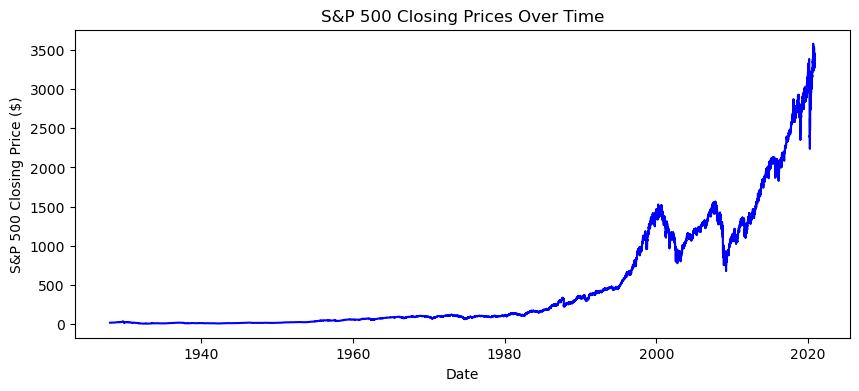

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('S&P 500 Closing Price ($)')
plt.show()

## Plotting the data

To better understand the dataset we are working with, we plot the S&P 500 closing prices over time. It is important to visualize the data before building a model for it to check the trend of the line.